# Assignment

## Importing Required Modules and reading csv's

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from scipy import stats

data = pd.read_csv('salary.csv')
descrip_of_vars = pd.read_csv('Salary_metadata.csv',sep = ';')
print(data.shape)
print(len(data))
print(data.head())
print(descrip_of_vars.shape)
print(descrip_of_vars.head(11))
print(descrip_of_vars['Explanation'].head(11))

(514, 11)
514
    salary  exprior  yearsworked  yearsrank  market  degree  otherqual  \
0  53000.0        0            0          0    1.17       1          0   
1  58000.0        1            0          0    1.24       1          0   
2  45500.0        0            0          0    1.21       1          0   
3  35782.0        0            2          1    0.99       1          0   
4  34731.0        0            2          2    0.91       1          0   

   position  male  Field  yearsabs  
0         1     1      3         0  
1         1     1      2         0  
2         1     1      3         2  
3         1     1      4         1  
4         1     1      4         1  
(11, 3)
       Variable         Type  \
0        salary   Continuous   
1       exprior   Continuous   
2   yearsworked   Continuous   
3     yearsrank   Continuous   
4        market   Continuous   
5        degree       Binary   
6     otherqual       Binary   
7      position  Categorical   
8          male       B

## 1.How many responders are there? Are there any missing values in any of the variables?

In [29]:
print(data.shape) #we have 514 rows
print(data.isnull().values.any())
print(data.isna().values.any()) # I believe this does the same this as isnull

data.info()
print(data.describe())

data = data.dropna()


(513, 11)
False
False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        513 non-null int64
yearsworked    513 non-null int64
yearsrank      513 non-null int64
market         513 non-null float64
degree         513 non-null int64
otherqual      513 non-null int64
position       513 non-null int64
male           513 non-null int64
Field          513 non-null int64
yearsabs       513 non-null int64
dtypes: float64(2), int64(9)
memory usage: 68.1 KB
             salary     exprior  yearsworked   yearsrank      market  \
count    513.000000  513.000000   513.000000  513.000000  513.000000   
mean   50863.220098    2.931774    12.836257    7.046784    0.948558   
std    12685.132358    4.794327     9.447040    6.419708    0.149524   
min    29000.000000    0.000000     0.000000    0.000000    0.710000   
25%    40000.000000    0.000000     4.000000    2.000000    0.840000   
50%    50096

There are 514 responders , but one had a NaN value and decided to drop him as it isnt a huge swing in data. 

## 2.What is the lowest salary and highest salary in the group?

In [6]:
minimum = data['salary'].min()
maximum = data['salary'].max()

print(f"{minimum} is the minimum and {maximum} is the maximum")

29000.0 is the minimum and 96156.0 is the maximum


The lowest in this dataset is 29 000 and highest 96 156 which shows the range of difference in salaries . This could be the level of importance in their respective jobs (CEO, Normal Worker) .In that regard it normal to have a pay gap. 

## 3.What is the mean salary for the sample? Include the standard error of the mean.

In [4]:
mean = data['salary'].mean()
std_error_mean = data['salary'].sem()
print(f"{mean} is the mean and the standard error of the mean id {std_error_mean}")

50863.22009783626 is the mean and the standard error of the mean id 560.0622753925232


The mean is 50 863 which is the average of the entire data set . In this regard this shows that majority actually earn more or the high salary is picking up the low earners which may skew out data . The standard error of the mean 560, is a measure of the dispersion of sample means around the salary .

## 4.What is the standard deviation for the years worked?

In [8]:
standard_dev = data['yearsworked'].std()
print(f"{standard_dev} is the standard deviation")

9.447040460636986 is the standard deviation


The standard deviation is 9.45 so of the years worked from the 12 mean showing that most of the numbers are close to the average .

## 5.What is the median salary for the sample?

In [9]:
median = data['salary'].median()
print(f"{median} is the median")

50096.0 is the median


The median or the middle , is 50 096 showing that the data seems roundabout split in the middle of 29000.0 and 96156.0 . 

## 6.What is the interquartile range for salary in the sample? 

In [13]:
Q1 = data['salary'].quantile(0.25)
Q3 = data['salary'].quantile(0.75)
IQR = Q3 - Q1
outlier_lower =  Q1 - IQR
outlier_upper =  Q3 + IQR
print(f'The interquartile range for salary is {IQR}')
print(f'The lower outlier boundary is {outlier_lower}')
print(f'The upper outlier boundary is {outlier_upper}')

The interquartile range for salary is 20345.0
The lower outlier boundary is 19655.0
The upper outlier boundary is 80690.0


The interquartile range also called the midspread or middle 50% is 20345.0 . Which is close to the minimum salary , but significantly less . SO anything above the Q3 + IQR is an outlier which means the highest salary is an outlier. 

## 7.How many men are there in the sample? How many women are there in the sample? Present this information in a table.

In [19]:
num_of_sex = data['male'].value_counts()
num_of_sex.index = ['male','female']
df_num_of_sex = num_of_sex.to_frame()
df_num_of_sex.columns = ['Gender']
print(df_num_of_sex)

        Gender
male       386
female     128


The number of males is significantly higher than females . This could be the reason women are fighting for equal opportunity as work has been a male dominated thing. Women are still playing catch up and thus the disparity.

## 8.How many women are executives compared to men? 

In [18]:
executives =  data[data['position']== 3]
executives['gender'] = executives['male'].apply(lambda sex: 'Male' if sex == 1 else 'Female')
print(executives['gender'].value_counts())

male_diff = 191/385*100
female_diff = 19/128*100
print(male_diff,female_diff)

Male      192
Female     19
Name: gender, dtype: int64
49.61038961038961 14.84375


/Users/oliverangelil/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


From this you can see the number of executives which is still high for men almost 50% which could also be the indication of having males working so long . Whereas females only 14% are executives which is fairly low .

## 9.Create a histogram for the variable Salary. 

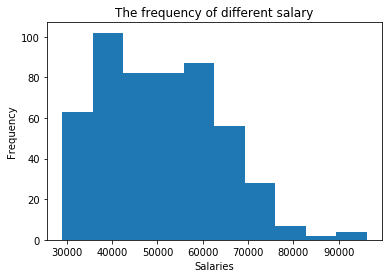

In [20]:
data['salary'].plot.hist()
plt.xlabel('Salaries')
plt.title('The frequency of different salary')
plt.show()

## 10.Examine the histogram and describe the distribution for Salary. 

The frequency decreases the more the client starts making . The cluster is around the 40 000 to 60 000 is the general majority hence the difference isnt as significant and has a high count . Showing thats where the mean and median is .  Showing that from there is a significant drop of frequency of people earning high amounts which could be the outliers .  

## 11.Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries? 

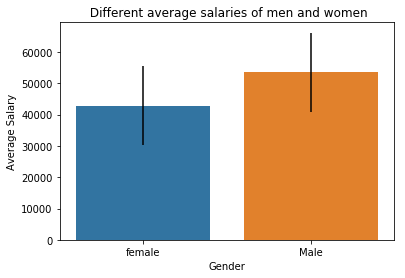

In [21]:
average_salary = data['salary'].groupby(data['male']).mean()
average_salary = average_salary.to_frame()
average_salary.index = ['female','Male']
sal_std = data['salary'].std()
sns.barplot(x=average_salary.index, y="salary", data=average_salary, yerr = sal_std, capsize=5)
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.title(' Different average salaries of men and women')
plt.show()

In a turn of events even when the women are significantly slower in number they are relativly close to the average salary males earn . Which could mean women earn more overall as men may have the outlier carrying /skewwing the data to seem like they making more.But Males still make more on average which is still pretty bad.

## 12.Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line).What is the relationship between Years Worked and Salary?Describe any patterns in the scatterplot.Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?) 

/Users/oliverangelil/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


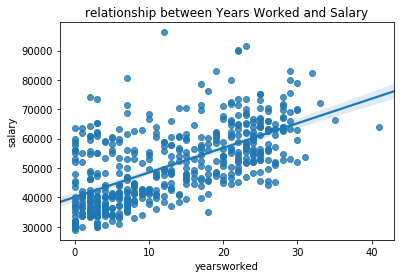

In [22]:
sns.regplot(x = data['yearsworked'], y = data['salary'])
plt.title('relationship between Years Worked and Salary')
plt.show()

The more years a person has worked the more they are more likely to earm a higher salary some are outliers who worked close to 12 years but the salary is still high . This could be a new age job as you need less work to but earn a significant amount . Umlike teachers who could work for years but not reflect in salary. Or the person who worked 40 years and is still bnot above the trend line .Might be a low income job. like mining 

## 13. Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function.Interpret the size and direction of the correlation statistic.Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.

In [27]:
pearson_corr = stats.pearsonr(data['yearsworked'], data['salary'])
print(pearson_corr)

(0.6235888657598045, 1.2873351342921916e-56)


The correlation coefficient (r=0.62) shows that there is a positive relationship between yearsworked and salary, and it is significant because the p-value is small (p << 0.05).